## Introduction to Bert

**🧠 What is BERT?**
BERT stands for

Bidirectional Encoder Representations from Transformers

It’s a language representation model developed by Google in 2018 that completely changed how machines understand human language.

**💡 Why BERT was a breakthrough**

Before BERT, most NLP models (like Word2Vec, GloVe, or earlier RNNs/LSTMs) read text from left to right or right to left, but not both at the same time.

➡️ That means they couldn’t fully understand context — for example:

“He went to the bank to deposit money”
vs
“He sat by the bank of the river”

The word “bank” means something different in each sentence — and older models struggled with this.

### **BERT is trained using two clever objectives on massive text data (like Wikipedia and BooksCorpus)**

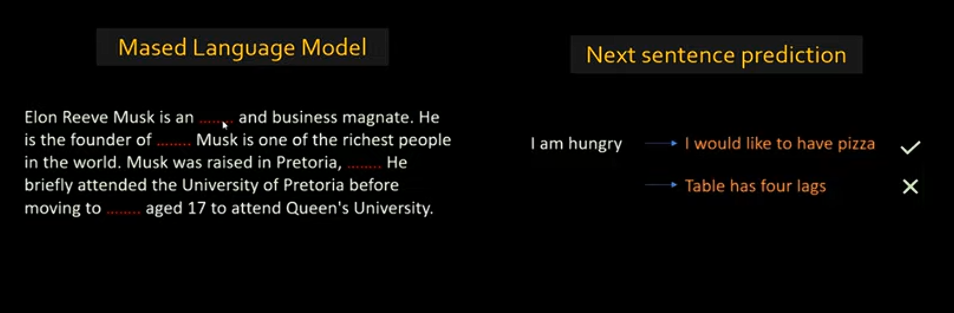

🏗️ BERT Architecture

Base model: 12 transformer encoder layers

Large model: 24 encoder layers

Each layer has:

* Multi-head self-attention

* Feed-forward network

* Layer normalization

* Positional encoding

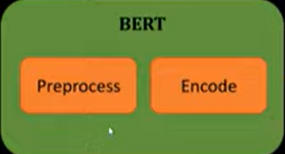

🧰 What BERT can do
1. Sentiment Analysis
2. Name Entity Recognition
3. Question answering
4. Text Summarization


**🧩 Summary**
| Feature        | BERT                          |
| -------------- | ----------------------------- |
| Architecture   | Transformer Encoder           |
| Context        | Bidirectional                 |
| Training Tasks | MLM + NSP                     |
| Strength       | Deep contextual understanding |
| Use Cases      | Classification, QA, NER, etc. |


In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [ ]:
bert_processes_model=hub.KerasLayer(preprocess_url)

In [ ]:
test_text=["nice topic indeed", 'not bad actually']
text_processed=bert_processes_model(test_text)


# seeing the keys of a bert model
text_processed.keys()


dict_keys(['input_type_ids', 'input_mask', 'input_word_ids'])

In [ ]:
text_processed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

⚙️ These 3 keys explained:

| Key                  | Name               | Description                                                                                                                        | Shape                           |
| -------------------- | ------------------ | ---------------------------------------------------------------------------------------------------------------------------------- | ------------------------------- |
| **`input_word_ids`** | **Token IDs**      | Numerical representation of the words (tokens). Each word/subword gets mapped to an integer from BERT’s vocabulary.                | `[batch_size, sequence_length]` |
| **`input_mask`**     | **Attention mask** | 1 for real tokens, 0 for padding tokens. Tells BERT which tokens to pay attention to and which to ignore.                          | `[batch_size, sequence_length]` |
| **`input_type_ids`** | **Segment IDs**    | Indicates which part of the input a token belongs to (used for sentence pairs). <br>• 0 = first sentence <br>• 1 = second sentence | `[batch_size, sequence_length]` |



**So basically**:

input_word_ids → actual tokens

input_mask → which ones are real

input_type_ids → which sentence they belong to

first sentense is =" nice topic indeed" here 3 words are presents


its corresponding input_mask is 1, 1, 1, 1, 1,

here first 1 for CLS(id 101)

last 1 for SEP (id 102)

In [ ]:
# create a bert model
bert_model=hub.KerasLayer(encoder_url)

In [ ]:
# run the model
bert_result=bert_model(text_processed)

In [ ]:
bert_result.keys()

dict_keys(['pooled_output', 'sequence_output', 'encoder_outputs', 'default'])

### Some terms

| Key                   | Meaning                                                                                                                                                                                      |
| --------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`pooled_output`**   | The embedding for the **[CLS] token**, often used for **classification tasks**. It’s a single vector representation of the entire input sentence. Shape: `[batch_size, hidden_size]`         |
| **`sequence_output`** | The embeddings for **each token** in the input sequence. Used for tasks like **NER, QA, or token classification**. Shape: `[batch_size, seq_length, hidden_size]`                            |
| **`encoder_outputs`** | The list of hidden states from **each transformer layer**. Used for analysis, visualization, or advanced fine-tuning. Shape: a list of tensors, each `[batch_size, seq_length, hidden_size]` |
| **`default`**         | Often the same as `pooled_output` or `sequence_output`, depending on the model API. It’s provided for convenience if you call the model without specifying an output type.                   |


simply:
1. pooled_output= embedding of whole sentence

2. sequence_output= embedding of 1 word

3. encoder_output= output of different encoder( bert has 12 encoder version and 24 encoder version)

In [ ]:
bert_result['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7171426 , -0.20290753,  0.52684164, ...,  0.17270967,
        -0.47150683,  0.78266454],
       [-0.8676244 , -0.2562697 , -0.5136888 , ..., -0.5768427 ,
        -0.5060924 ,  0.90872765]], dtype=float32)>

In [ ]:
bert_result['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.0827811 ,  0.17853759,  0.14296256, ..., -0.0359086 ,
          0.04949543,  0.19680959],
        [-0.01414375,  0.04430901,  0.12728512, ..., -0.01212841,
          0.11951872,  0.07123867],
        [-0.0543129 ,  0.11453424,  0.00775348, ...,  0.62537056,
          0.46376398, -0.54722977],
        ...,
        [ 0.0439334 ,  0.17831725,  0.33027974, ...,  0.00708905,
         -0.06457409,  0.2931795 ],
        [-0.06113419,  0.01240776,  0.44541088, ...,  0.2382378 ,
          0.05463154,  0.00100078],
        [-0.24322215, -0.2054474 ,  0.50998414, ...,  0.5845186 ,
          0.09120944, -0.07271797]],

       [[-0.11066952, -0.03654875, -0.1112008 , ...,  0.11495265,
          0.24727444,  0.42803958],
        [-0.4502399 , -0.6517941 , -0.40472955, ..., -0.13586164,
          0.34793267,  0.48096168],
        [-0.46501163, -0.15336883, -0.16621765, ..., -0.0195131 ,
          0.05416223, -0.12297717],
        ...,

In [ ]:
bert_result['encoder_outputs']

[<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
 array([[[ 0.13388848,  0.01802232,  0.01376616, ..., -0.00288415,
           0.03739914, -0.02944544],
         [ 1.0467399 ,  1.14586   ,  1.278944  , ..., -0.13245876,
          -0.46922073, -0.3223406 ],
         [ 0.12907399,  1.0425549 ,  2.1682515 , ...,  0.42966557,
           0.60273117, -1.4711033 ],
         ...,
         [ 0.02455558, -0.23676041,  0.83296627, ...,  0.22610237,
          -0.48556817,  0.12251437],
         [-0.06964963, -0.2620086 ,  0.6773709 , ...,  0.2670628 ,
          -0.36468524,  0.01291055],
         [ 0.04830453, -0.18339297,  0.71579134, ...,  0.58066493,
          -0.6796244 , -0.04444387]],
 
        [[ 0.14408445,  0.03350282, -0.05637157, ...,  0.05171999,
           0.10096489,  0.02272237],
         [ 0.49721974,  0.38630086,  0.5532496 , ...,  0.50256246,
          -0.35792595,  0.08656238],
         [-0.09651993,  0.30660936, -1.076862  , ..., -0.5378902 ,
           0.35259354, -0.04